# Introduction

Abi Rahman Sugiri

FTDS RMT 021

## Description

### Objective

Implementing Artificial Neural Network (ANN) for predicting Churn Risk Score

### Problem Statement

Reduce churn risk score by predicting from machine learning method

## About the Dataset

Features in this dataset:

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

# Importing Libraries

In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import time
import warnings
warnings.filterwarnings('ignore')

c:\Users\abisu\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abisu\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\abisu\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Loading Data

In [2]:
#Loading Data
data = pd.read_csv(r'C:\Users\abisu\p2-ftds021-rmt-ml1-abisugiri\churn.csv')
pd.set_option('display.max_columns', None)
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [3]:
# First 10 data entries
data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# Last 10 data entries
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# display of data shape
data.shape

(37010, 22)

This dataset has 22 columns and 37010 data entries

In [6]:
# Checking duplicated data
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
37005    False
37006    False
37007    False
37008    False
37009    False
Length: 37010, dtype: bool>

In [7]:
# Checking the amount of duplicated data entries
data.duplicated().sum()

18

This dataset has 18 duplicated data entries

# Exploratory Data Analysis (EDA)

In [8]:
# Checking data types
data.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [9]:
#checking dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [10]:
#Checking for missing values

data.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

59 missing values on `gender` column, 5431 on `region_category`, 5442 on `joined_through_referral`, 288 on `preferred_offer_types` and 5395 on `medium_of_operation`.

In the next step, user tries to find the pattern for the missing values.

In [11]:
data[data['region_category'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,21:51:51,12,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,10:27:41,18,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,10:09:04,21,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,04:04:06,10,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,00:50:55,7,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


In [12]:
data[data['gender'].isnull()].head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,12:34:37,13,156.07,32463.61,16.0,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,02:55:43,13,262.65,35934.73,19.0,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,10:11:30,14,333.25,21440.09,18.0,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,10:18:06,17,93.88,38875.53,22.0,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,14:28:42,13,52.11,28298.29,6.0,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1


In [13]:
data[data['preferred_offer_types'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,23:32:55,-999,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,00:30:41,-999,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,01:29:53,13,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,05:06:12,5,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,04:39:49,15,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,09:54:28,12,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,07:54:15,16,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,08:51:10,15,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1
36565,851bb0bed651ee79,57,M,NaN,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,03:32:59,13,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1


In [14]:
data[data['medium_of_operation'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00,Yes,Yes,No,Not Applicable,Products always in Stock,0
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,08:29:45,2,39.850000,24087.96,10.0,656.38,Yes,No,No,Not Applicable,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36981,9910a08d19c267cb,60,F,NaN,Platinum Membership,2015-05-24,Yes,Without Offers,NaN,Mobile_Data,11:17:58,15,147.610000,6947.31,15.0,814.68,No,Yes,No,Not Applicable,Reasonable Price,0
36995,aef81486b7cc8c73,51,M,Village,Silver Membership,2015-06-18,No,Credit/Debit Card Offers,NaN,Fiber_Optic,18:57:57,4,254.670000,12748.24,18.0,0.00,Yes,No,Yes,Unsolved,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:47:24,-999,831.490000,37021.18,25.0,751.48,No,Yes,Yes,No Information Available,Poor Website,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


User didn't find the pattern for the missing values. Handling the missing values will be executed on the Feature Engineering chapter.

In [15]:
# displaying basic statistic from the dataset
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Based on the basic statistics check above, there are several findings, namely:
- `days_since_last_login` appears to be not symmetrical. This is because the mean and median (50th percentile) values have big gap.
- `age`, `avg_time_spent`, `avg_transaction_value`, `avg_frequency_login_days` and `points_in_wallet` appear to be fairly symmetrical. This is because the mean and median (50th percentile) values are close enough.

<Axes: >

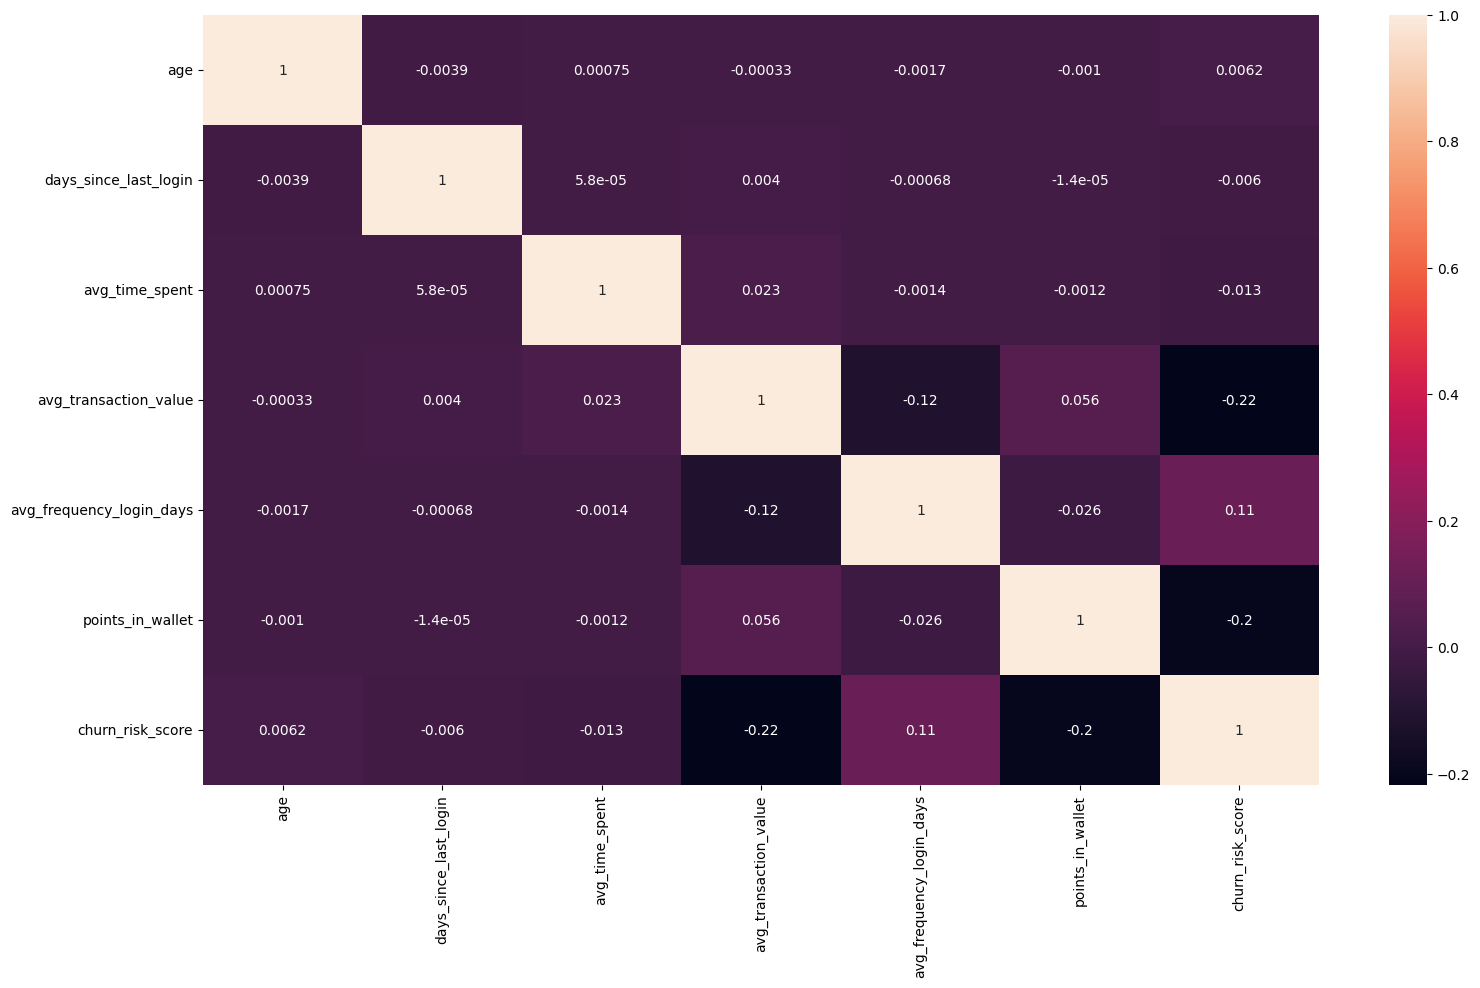

In [16]:
# heatmap correlation
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(),annot=True)

Correlation between the numeric columns are very low. Most of the correlation score are near 0.

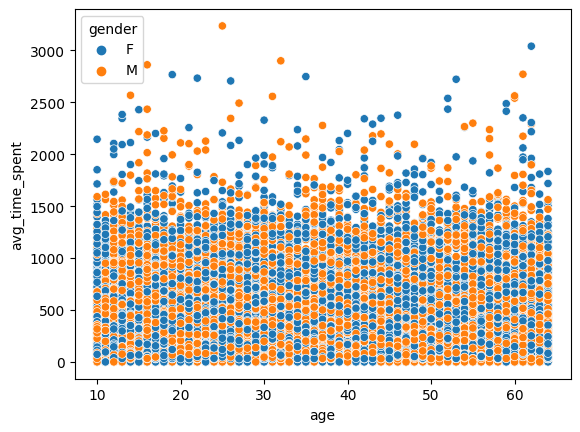

In [17]:
# Scatter Plot dari age dan y beserta perbandingan sex
sns.scatterplot(data, x='age', y='avg_time_spent', hue='gender')
plt.show()

From the scatter plot above that the average time customer spent on the websiste are most of them below 1500

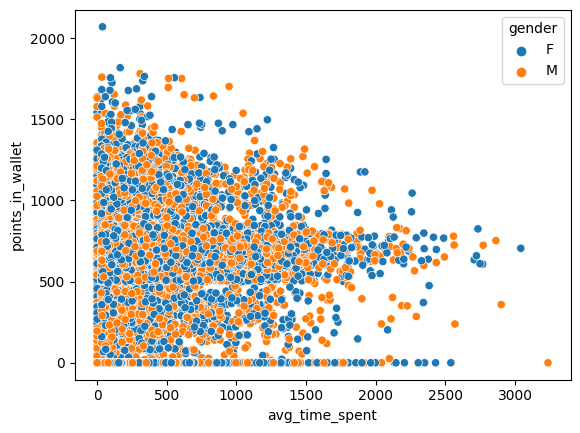

In [18]:
# Scatter Plot 
sns.scatterplot(data, x='avg_time_spent', y='points_in_wallet', hue='gender')
plt.show()

The scatter plot from above shows that the more customers spen time on the website usually the points that they have are around 500-800.

In [19]:
#Counting churn_risk_score
counts_churn = data['churn_risk_score'].value_counts()

In [20]:
churn = pd.DataFrame(counts_churn)
churn

,churn_risk_score
1,20018
0,16992


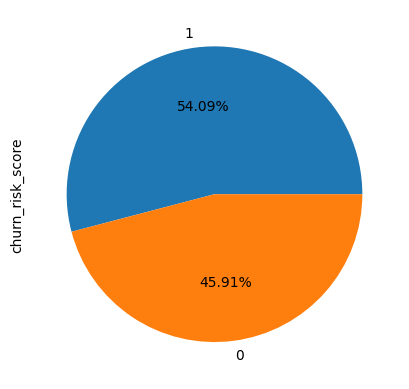

In [21]:
#plot pie chart
churn.plot.pie(subplots=True, legend=None,autopct='%.2f%%')
plt.show()

The churn risk score is exceding the acceptable rate which is 2-8%. Extreme high churn rate can be an indicator to customer's satisfactory to the website and impact negatively to the revenue.

In [22]:
#Counting region_category
counts_regio = data['region_category'].value_counts()

In [23]:
regio = pd.DataFrame(counts_regio)
regio

,region_category
Town,14135
City,12744
Village,4700


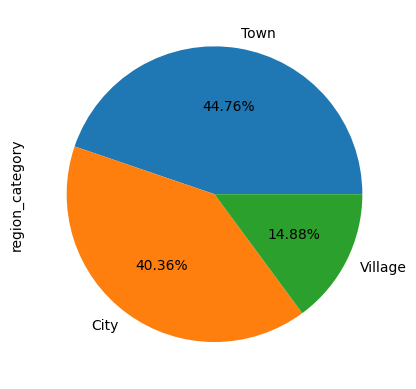

In [24]:
#plot pie chart
regio.plot.pie(subplots=True, legend=None,autopct='%.2f%%')
plt.show()

Most of the customer live in towns (44.76%) and the least is village (14.88%)

In [25]:
#Counting joined_through_referral
counts_referral = data['joined_through_referral'].value_counts()

In [26]:
reffe = pd.DataFrame(counts_referral)
reffe

,joined_through_referral
No,15846
Yes,15722


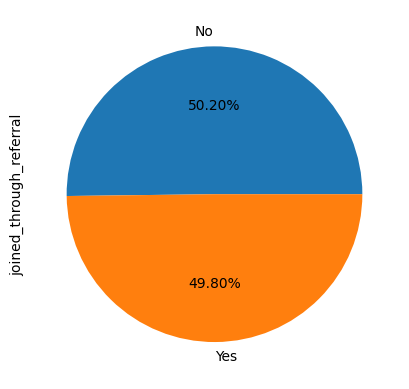

In [27]:
#plot pie chart
reffe.plot.pie(subplots=True, legend=None, autopct='%.2f%%')
plt.show()

Customer's gender are quite balance with both gender are near 50%.

In [28]:
#Counting preferred_offer_types
counts_offer = data['preferred_offer_types'].value_counts()

In [29]:
offer = pd.DataFrame(counts_offer)
offer

,preferred_offer_types
Gift Vouchers/Coupons,12357
Credit/Debit Card Offers,12281
Without Offers,12084


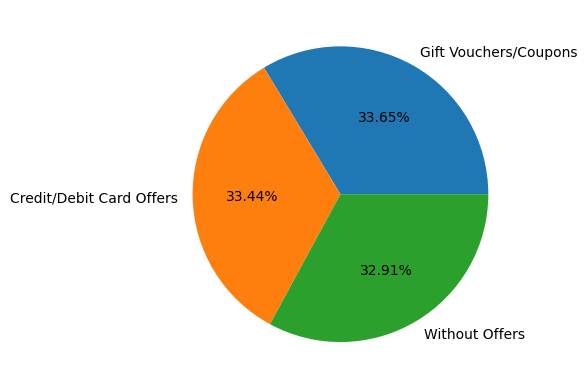

In [30]:
y = np.array([12357, 12281, 12084])
mylabels = ["Gift Vouchers/Coupons", "Credit/Debit Card Offers", "Without Offers"]

plt.pie(y, labels = mylabels, autopct='%.2f%%')
plt.show() 

Percentage of `preferred_offer_types` for each types are quite balance, each has around 33%.

In [31]:
#Counting medium_of_operation
counts_medium = data['medium_of_operation'].value_counts()

In [32]:
medium = pd.DataFrame(counts_medium)
medium

,medium_of_operation
Desktop,13917
Smartphone,13885
Both,3813


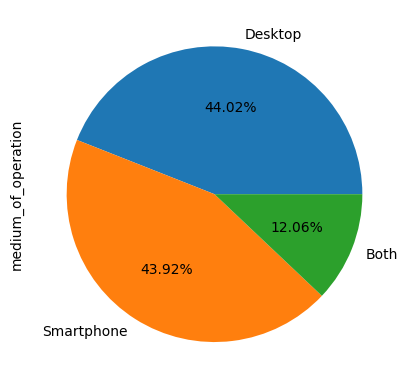

In [33]:
#plot pie chart
medium.plot.pie(subplots=True, legend=None,autopct='%.2f%%')
plt.show()

Most customer use Desktop to access the website (44.02%) and only 12 % that use both desktop and smartphone. 

In [34]:
#Counting complaint_status
counts_complaint = data['complaint_status'].value_counts()

In [35]:
complaint = pd.DataFrame(counts_complaint)
complaint

,complaint_status
Not Applicable,18611
Unsolved,4647
Solved,4622
Solved in Follow-up,4579
No Information Available,4551


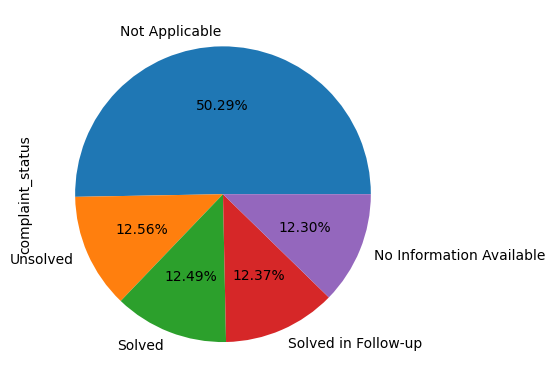

In [36]:
#plot pie chart
complaint.plot.pie(subplots=True, legend=None,autopct='%.2f%%')
plt.show()

"Not Applicable" has the biggest percentage for `complaint_status` with around 50% and the other status are around 12% for each type.

In [37]:
#Counting complaint_status
counts_feedback = data['feedback'].value_counts()

In [38]:
feedback = pd.DataFrame(counts_feedback)
feedback

,feedback
Poor Product Quality,6353
No reason specified,6295
Too many ads,6282
Poor Website,6273
Poor Customer Service,6255
Reasonable Price,1417
User Friendly Website,1393
Products always in Stock,1382
Quality Customer Care,1360


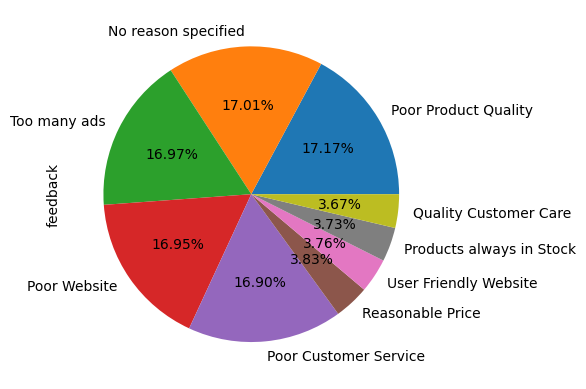

In [39]:
#plot pie chart
feedback.plot.pie(subplots=True, legend=None,autopct='%.2f%%')
plt.show()

The most type of feedback recieved is "Poor Product Quality" (17.17%) and the least is "Product always in Stock" (3.73%). Every negative feedbacks, with each negative feedback has over 16.5% and for each positive feedback has less than 4%.

# Feature Engineering

In [40]:
data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


## Feature Selection

In this stage, the user will drop columns or features that are not relevant to ANN model. These features are: `user_id`, `last_visit_time` and `joining_date`.

In [41]:
data.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)
data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,20,M,NaN,Gold Membership,Yes,Without Offers,NaN,Mobile_Data,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,38,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


## Splitting between Train-Set, Val-Set, and Test-Set

The dataset are divided into train-set, val-set, and test-set. ANN model needs to have validation set for the user so that the model's hyperparameter can be tuned.

In [42]:
# Splitting between `X` and `y`

X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [43]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=16)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=16)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 18)
Val Size :  (4719, 18)
Test Size :  (5552, 18)


## Handling Missing Values

In this sub-chapter the user will handle the missing values in Train-Set, Val-Set, dan Test-Set.

In [44]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                                0
gender                            51
region_category                 3959
membership_category                0
joined_through_referral         3963
preferred_offer_types            206
medium_of_operation             3871
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [45]:
# Check Missing Values on X_val

X_val.isnull().sum()

age                               0
gender                            5
region_category                 659
membership_category               0
joined_through_referral         686
preferred_offer_types            39
medium_of_operation             699
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [46]:
# Check Missing Values on X_test

X_test.isnull().sum()

age                               0
gender                            3
region_category                 813
membership_category               0
joined_through_referral         793
preferred_offer_types            43
medium_of_operation             825
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

This missing values in this stage will be handled by imputation.

In [47]:
data["gender"].unique()

array(['F', 'M', nan], dtype=object)

There's a possibility that the customers were not willing to give this information, thus the missing values will be imputed by "Unknown".

In [48]:
# Missing value on fitur gender
X_train["gender"].fillna("Unknown", inplace = True)
X_val["gender"].fillna("Unknown", inplace = True)
X_test["gender"].fillna("Unknown", inplace = True)

In [49]:
data["region_category"].unique()

array([nan, 'City', 'Village', 'Town'], dtype=object)

In [50]:
data["region_category"].nunique()

3

The reason for the missing value of `region_category` could be that the region was undetected. The user decided to impute "Unknown".

In [51]:
# Missing value on region_category
X_train["region_category"].fillna("Unknown", inplace = True)
X_val["region_category"].fillna("Unknown", inplace = True)
X_test["region_category"].fillna("Unknown", inplace = True)

In [52]:
data["joined_through_referral"].unique()

array(['Yes', nan, 'No'], dtype=object)

The values in `joined_through_referral` are only "Yes" dan "No". We assumed that the cause of the missing values is because the customers did not input this information, therefore the user will input the missing values as "No".

In [53]:
# Missing value on joined_through_referral
X_train["joined_through_referral"].fillna("No", inplace = True)
X_val["joined_through_referral"].fillna("No", inplace = True)
X_test["joined_through_referral"].fillna("No", inplace = True)

In [54]:
data["preferred_offer_types"].unique()

array(['Without Offers', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons', nan], dtype=object)

Similar to `joined_through_referral`, the user assumed that the customers did not input this information and will be impute as "Without Offers".

In [55]:
# Missing values on preferred_offer_types
X_train["preferred_offer_types"].fillna("Without Offers", inplace = True)
X_val["preferred_offer_types"].fillna("Without Offers", inplace = True)
X_test["preferred_offer_types"].fillna("Without Offers", inplace = True)

In [56]:
data["medium_of_operation"].unique()

array([nan, 'Desktop', 'Smartphone', 'Both'], dtype=object)

The missing values on `medium_of_operation` are assumed that the devices were not detected, thus "Unknown" will be imputed.


In [57]:
# Missing value on medium_of_operation
X_train["medium_of_operation"].fillna("Unknown", inplace = True)
X_val["medium_of_operation"].fillna("Unknown", inplace = True)
X_test["medium_of_operation"].fillna("Unknown", inplace = True)

In [58]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [59]:
# Check Missing Values on X_train

X_val.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [60]:
# Check Missing Values on X_train

X_test.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

## Handling Anamoalies

In [61]:
data.head(2)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [62]:
data["days_since_last_login"].unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   13,   15,    6,   22,   16,   18,   25, -999,
         24,   23,    1,   21,   26], dtype=int64)

There's an anomaly in `days_since_last_login`, which is the value "-999". User assumed that this is an error from the system, thus it will be replace with the value "0".

In [63]:
X_train.replace(-999, 0, inplace=True)
X_val.replace(-999, 0, inplace=True)
X_test.replace(-999, 0, inplace=True)

In [64]:
X_train["days_since_last_login"].unique()

array([11,  5, 25,  6, 15,  0, 18, 21,  9, 12,  8, 22, 16, 19, 23,  3,  7,
       26, 14, 20, 10, 24, 13,  4, 17,  1,  2], dtype=int64)

In [65]:
X_val["days_since_last_login"].unique()

array([21,  0,  1, 12, 17, 14, 16,  2, 13,  5, 18, 22, 15,  7, 20,  9, 10,
       23, 11,  6,  3,  4, 19, 24,  8, 26, 25], dtype=int64)

In [66]:
X_test["days_since_last_login"].unique()

array([13, 11,  7, 19, 16,  6, 17, 15, 23, 14, 10, 21,  8,  4,  0, 12, 20,
        5,  9,  2, 22, 24,  3, 18, 26,  1, 25], dtype=int64)

## Handling Outliers

In this chapter the user will now try to display and handle outliers

In [67]:
# Handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

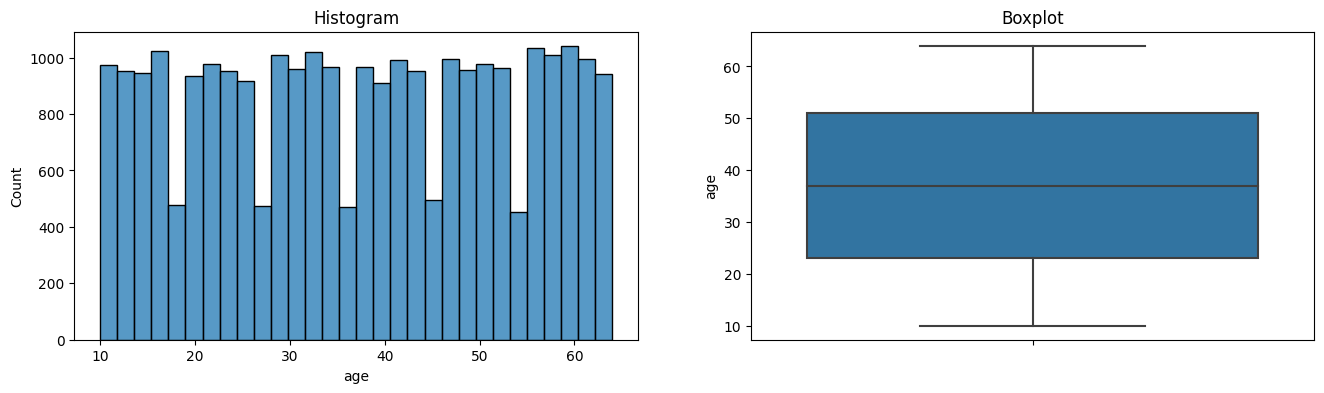


Skewness Value :  -0.012379610691344889


In [68]:
# Inspeksi variable age from the dataframe

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

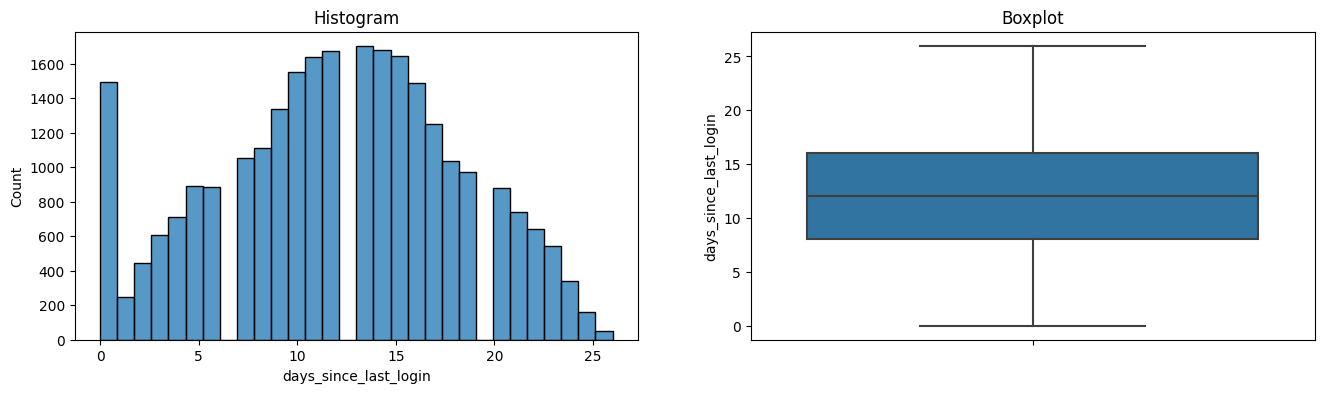


Skewness Value :  -0.13250902530020314


In [69]:
# Inspeksi variable days_since_last_login from the dataframe

diagnostic_plots(X_train, 'days_since_last_login')
print('\nSkewness Value : ', X_train['days_since_last_login'].skew())

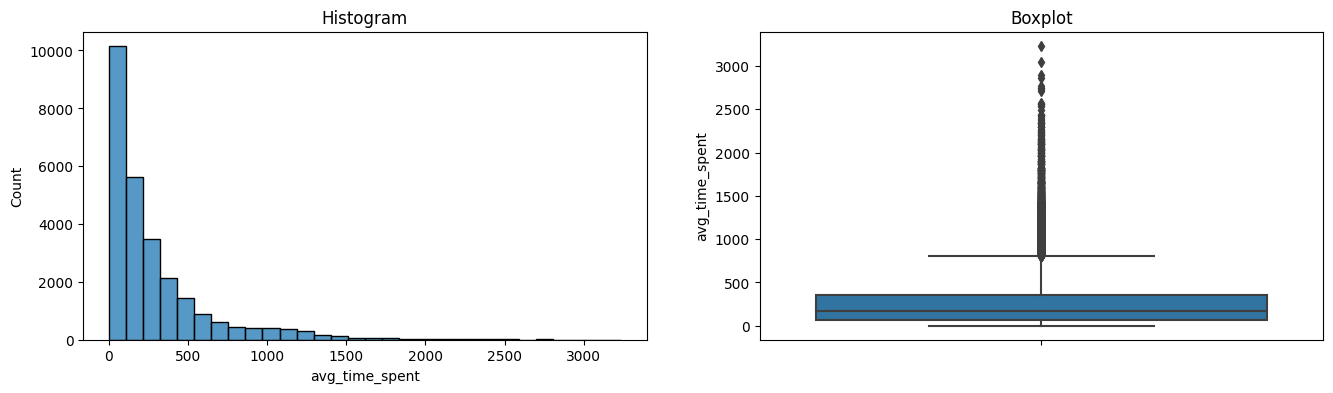


Skewness Value :  2.2980689804983623


In [70]:
# Inspeksi variable avg_time_spent from the dataframe

diagnostic_plots(X_train, 'avg_time_spent')
print('\nSkewness Value : ', X_train['avg_time_spent'].skew())

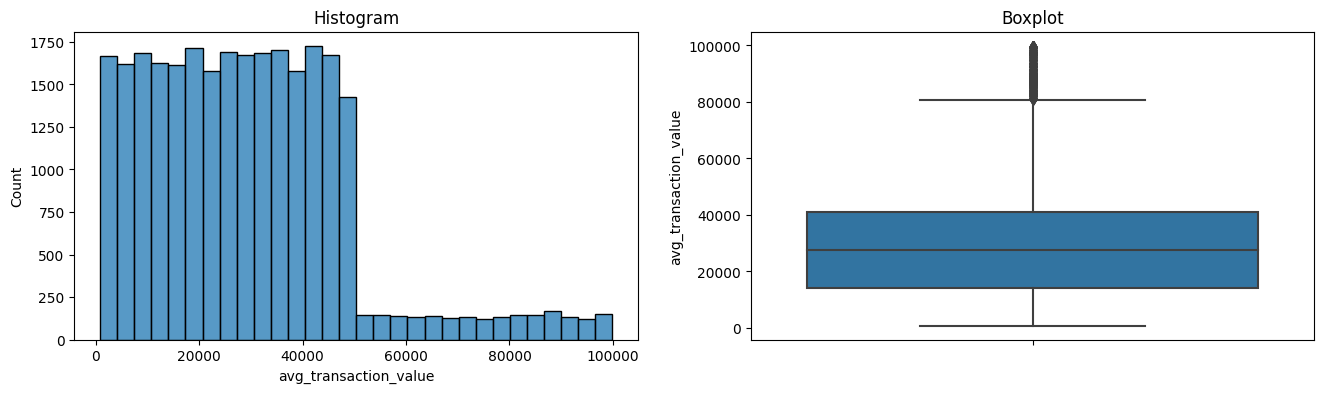


Skewness Value :  1.0227361213235833


In [71]:
# Inspeksi variable avg_transaction_value from the dataframe

diagnostic_plots(X_train, 'avg_transaction_value')
print('\nSkewness Value : ', X_train['avg_transaction_value'].skew())

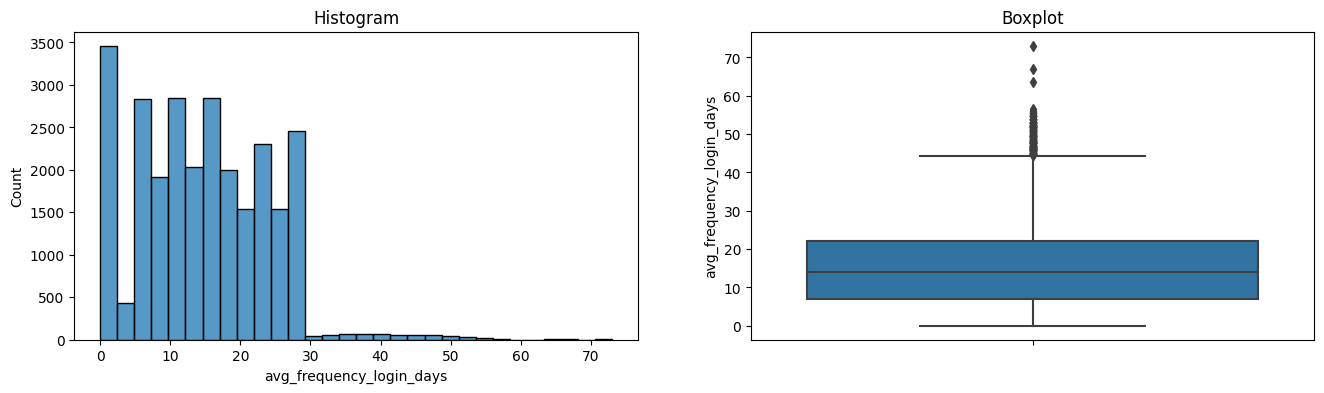


Skewness Value :  0.3944640563801731


In [72]:
# Inspeksi variable avg_frequency_login_days from the dataframe

diagnostic_plots(X_train, 'avg_frequency_login_days')
print('\nSkewness Value : ', X_train['avg_frequency_login_days'].skew())

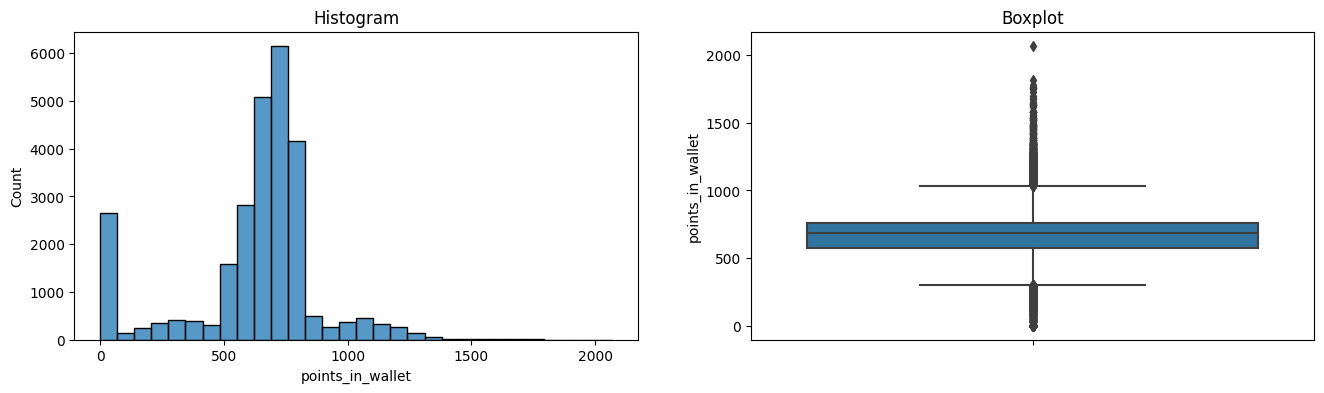


Skewness Value :  -0.7723254822526024


In [73]:
# Inspeksi variable points_in_wallet from the dataframe

diagnostic_plots(X_train, 'points_in_wallet')
print('\nSkewness Value : ', X_train['points_in_wallet'].skew())

User decided to not handle the outliers to keep the authenticity of the data for the modeling.

## Get Numerical Columns and Categorical Columns

In this chapter the dataset will be divided into numerical and categorical columns for encoding and scaling.

In [74]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


## Pipeline

Applying pipeline for simplicity.

In [75]:
# Create A Pipeline

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([('pipe_num', num_pipeline, num_columns), ('pipe_cat', cat_pipeline, cat_columns)])

In [76]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26739, 51)

In [77]:
X_train

array([[0.40740741, 0.42307692, 0.0619271 , ..., 0.        , 0.        ,
        0.        ],
       [0.92592593, 0.19230769, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07407407, 0.96153846, 0.01281069, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18518519, 0.30769231, 0.02136558, ..., 0.        , 0.        ,
        0.        ],
       [0.94444444, 0.80769231, 0.03190156, ..., 0.        , 0.        ,
        0.        ],
       [0.85185185, 0.76923077, 0.01049271, ..., 0.        , 1.        ,
        0.        ]])

In [78]:
# Training
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).shuffle(100).repeat(2).prefetch(tf.data.AUTOTUNE)

# Validation
val_pipe   = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(32)

# Sequential API

## Model Definition

In [110]:
# Clear Session

import tensorflow as tf

seed = 27
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

The first model is sequential API with 2 hidden layers. The first layer has 64 neurons, axon = relu, and initializer = GlorotUniform. Second layer has 16 neurons, axon = relu, and initializer = HeNormal. Output layer's activation function is sigmoid and with GlorotNormal as initializer. Optimizer for the compiler is Nadam.

In [111]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential_1 = Sequential()
model_sequential_1.add(Dense(64,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                           input_shape=(51,))) # Hidden Layer 1
model_sequential_1.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential_1.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential_1.compile(loss='binary_crossentropy',
                         optimizer='nadam',
                         metrics=['accuracy'])
model_sequential_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3328      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


## Model Training

The epoch on this model training is 150.

In [112]:
# Train the Model
start_time = time.time()

history_seq_1 = model_sequential_1.fit(train_pipe,
                                epochs=150,
                                validation_data=(val_pipe),
                                batch_size=16)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
1672/1672 [==============================] - 6s 2ms/step - loss: 0.2824 - accuracy: 0.8488 - val_loss: 0.2556 - val_accuracy: 0.8563
Epoch 2/150
1672/1672 [==============================] - 4s 3ms/step - loss: 0.2556 - accuracy: 0.8614 - val_loss: 0.2555 - val_accuracy: 0.8563
Epoch 3/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.8644 - val_loss: 0.2584 - val_accuracy: 0.8527
Epoch 4/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.8671 - val_loss: 0.2597 - val_accuracy: 0.8498
Epoch 5/150
1672/1672 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.8695 - val_loss: 0.2592 - val_accuracy: 0.8487
Epoch 6/150
1672/1672 [==============================] - 4s 3ms/step - loss: 0.2463 - accuracy: 0.8731 - val_loss: 0.2615 - val_accuracy: 0.8481
Epoch 7/150
1672/1672 [==============================] - 6s 3ms/step - loss: 0.2443 - accuracy: 0.8755 - val_loss: 0.2626 - val_ac

## Model Evaluation

The model now will be evaluated by inspecting the loss and accuracy values

In [113]:
# Create DataFrame

history_seq_df_1 = pd.DataFrame(history_seq_1.history)
history_seq_df_1

,loss,accuracy,val_loss,val_accuracy
0,0.282355,0.848835,0.255633,0.856326
1,0.255629,0.861420,0.255525,0.856326
2,0.253393,0.864412,0.258411,0.852723
3,0.251131,0.867067,0.259667,0.849756
4,0.248310,0.869535,0.259197,0.848697
...,...,...,...,...
145,0.080641,0.968398,0.439312,0.899767
146,0.079856,0.969389,0.441518,0.895741
147,0.080375,0.969034,0.446133,0.897436
148,0.079084,0.969801,0.444145,0.897648


<Axes: >

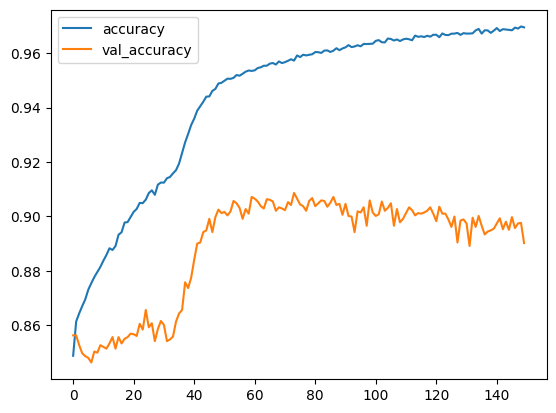

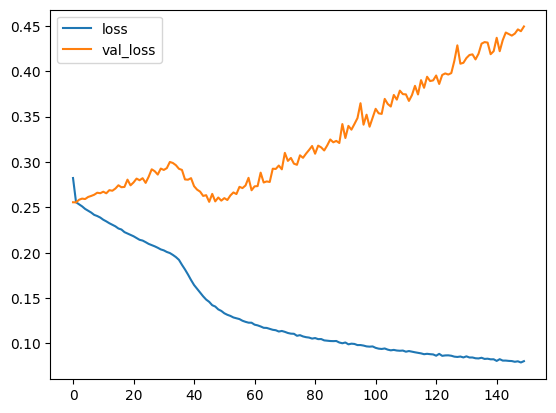

In [114]:
# Plot Training Results

history_seq_df_1[['accuracy', 'val_accuracy']].plot()
history_seq_df_1[['loss', 'val_loss']].plot()

From the graphs above it seems the model overfits because the gap widens between training and validation set from the loss graph.

In [115]:
model_sequential_1.predict(X_test)

174/174 [==============================] - 1s 2ms/step


array([[3.7518111e-23],
       [9.1925615e-01],
       [9.9957311e-01],
       ...,
       [9.8350012e-01],
       [9.9844956e-01],
       [2.2252770e-14]], dtype=float32)

In [116]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq_1 = model_sequential_1.predict(X_test)
y_pred_seq_1 = np.where(y_pred_seq_1 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_1))

119/174 [===================>..........] - ETA: 0s

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2496
           1       0.91      0.89      0.90      3056

    accuracy                           0.89      5552
   macro avg       0.89      0.89      0.89      5552
weighted avg       0.89      0.89      0.89      5552



Above is the classification report for the test set. The results of the precision, recall, and f1-score for both "0" and "1" are quite impressive, although the model overfits.

# Functional API

## Model Definition

In [118]:
# Clear Session

import tensorflow as tf

seed = 27
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

This second model is Functional API with 2 hidden layers. The first hidden layer has 64 neurons, axon = relu, and initializer GlorotUniform. Second layer has 16 neurons, axon = relu, and initializer HeNormal. The activation function for the output layer is sigmoid and the initializer is GlorotNormal. The layers that are concated are inpot and second hidden layer. Optimizer for this model is Nadam.

In [120]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(51,))
hidden_layer_1 = Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed))(input_layer)
hidden_layer_2 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='nadam',
                         metrics='accuracy')
model_functional_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 64)           3328        ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 16)           1040        ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 67)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

## Model Training

The model will be trained with 150 epochs

In [121]:
# Train the Model
start_time = time.time()

history_func = model_functional_2.fit(train_pipe,
                                epochs=150,
                                validation_data=(val_pipe))
                                #batch_size=64)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
1672/1672 [==============================] - 7s 3ms/step - loss: 0.2871 - accuracy: 0.8439 - val_loss: 0.2541 - val_accuracy: 0.8589
Epoch 2/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.8608 - val_loss: 0.2666 - val_accuracy: 0.8476
Epoch 3/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2536 - accuracy: 0.8638 - val_loss: 0.2564 - val_accuracy: 0.8601
Epoch 4/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2514 - accuracy: 0.8676 - val_loss: 0.2565 - val_accuracy: 0.8540
Epoch 5/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.8692 - val_loss: 0.2552 - val_accuracy: 0.8578
Epoch 6/150
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.8718 - val_loss: 0.2560 - val_accuracy: 0.8601
Epoch 7/150
1672/1672 [==============================] - 4s 3ms/step - loss: 0.2461 - accuracy: 0.8741 - val_loss: 0.2577 - val_ac

In [122]:
history_func_2 = history_func

## Model Evaluation

After training the model the accuracy and loss scored from both training and validation set will be evaluated.

In [123]:
# Create DataFrame

history_func_df_2 = pd.DataFrame(history_func_2.history)
history_func_df_2

,loss,accuracy,val_loss,val_accuracy
0,0.287070,0.843861,0.254072,0.858868
1,0.255617,0.860784,0.266597,0.847637
2,0.253583,0.863794,0.256428,0.860140
3,0.251410,0.867590,0.256456,0.853994
4,0.249724,0.869161,0.255184,0.857809
...,...,...,...,...
145,0.140795,0.940125,0.525814,0.842551
146,0.141353,0.939489,0.529410,0.846366
147,0.142072,0.939452,0.523786,0.842975
148,0.141121,0.939657,0.515613,0.848061


<Axes: >

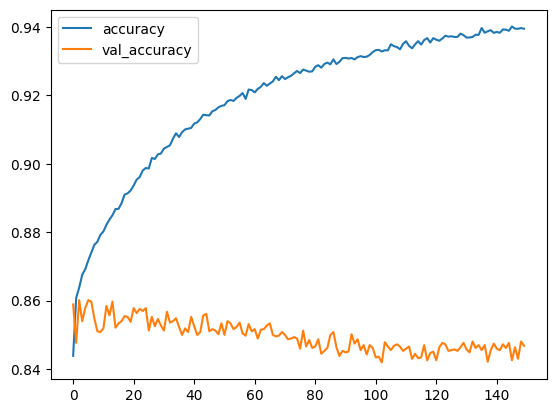

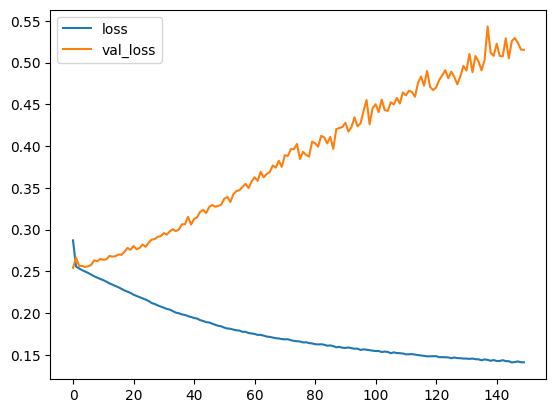

In [124]:
# Plot Training Results

history_func_df_2[['accuracy', 'val_accuracy']].plot()
history_func_df_2[['loss', 'val_loss']].plot()

The model overfits with the gap keeps widening from the loss values of both training and validation set with the increase of the epochs.

In [125]:
# Evaluate Test-Set

y_pred_func_2 = model_functional_2.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_2))

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2496
           1       0.86      0.87      0.86      3056

    accuracy                           0.85      5552
   macro avg       0.85      0.85      0.85      5552
weighted avg       0.85      0.85      0.85      5552



The result is quite underwhelming in comparison to the first model, where all the scores are bellow 90%. The model can be imporved for both first and second model by tuning the hyperparameters.

# Model Improvement (Sequential API)

In [84]:
# Clear Session

import tensorflow as tf

seed = 27
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

The user attempted to improve the sequential API model by simplifying the neurons of the first hidden layer (32 neurons) and changed the initializer to Henormal. Adding dropout before second hidden layer and after third hidden layer. The total of hidden layers in this model is 3. Where the second model has 16 neurons and the third has 8 neurons.

In [85]:
# Create Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_sequential_3 = Sequential()
model_sequential_3.add(Dense(32,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(51,))) # Hidden Layer 1
model_sequential_3.add(Dropout(0.3))
model_sequential_3.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential_3.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3

model_sequential_3.add(Dropout(0.2))
model_sequential_3.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential_3.compile(loss='binary_crossentropy',
                         optimizer='nadam',
                         metrics=['accuracy'])
model_sequential_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1664      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainabl

Penambahan hidden layer dan mengganti optimizer menjadi sgd

## Model Training

The epochs will be 200 for this model training.

In [86]:
# Train the model
start_time = time.time()

history_seq_3 = model_sequential_3.fit(train_pipe, epochs=200, validation_data=(val_pipe))

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/200


1672/1672 [==============================] - 5s 2ms/step - loss: 0.3895 - accuracy: 0.7955 - val_loss: 0.2548 - val_accuracy: 0.8462
Epoch 2/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2787 - accuracy: 0.8492 - val_loss: 0.2529 - val_accuracy: 0.8510
Epoch 3/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.8514 - val_loss: 0.2532 - val_accuracy: 0.8519
Epoch 4/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.8546 - val_loss: 0.2538 - val_accuracy: 0.8474
Epoch 5/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.8553 - val_loss: 0.2538 - val_accuracy: 0.8534
Epoch 6/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.8597 - val_loss: 0.2549 - val_accuracy: 0.8487
Epoch 7/200
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.8601 - val_loss: 0.2541 - val_accuracy: 0.85

## Model Evaluation

In [88]:
# Create DataFrame

history_seq_df_3 = pd.DataFrame(history_seq_3.history)
history_seq_df_3

,loss,accuracy,val_loss,val_accuracy
0,0.389521,0.795523,0.254832,0.846154
1,0.278682,0.849172,0.252850,0.851028
2,0.272459,0.851378,0.253238,0.851875
3,0.269524,0.854557,0.253781,0.847425
4,0.268478,0.855286,0.253757,0.853359
...,...,...,...,...
195,0.183236,0.925427,0.241448,0.914601
196,0.184080,0.924137,0.247139,0.913541
197,0.185840,0.923744,0.248016,0.908243
198,0.184754,0.925427,0.253193,0.906972


<Axes: >

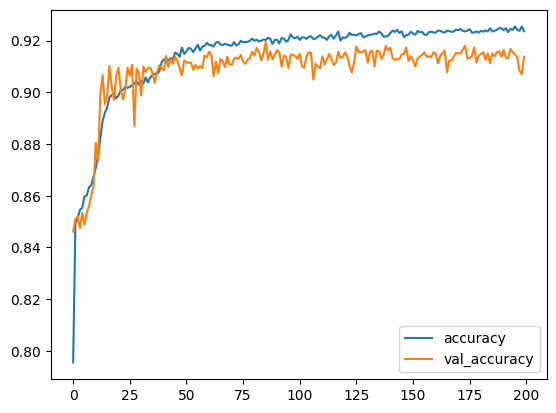

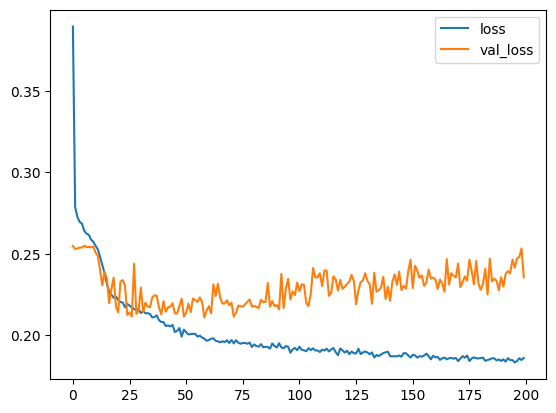

In [89]:
# Plot Training Results

history_seq_df_3[['accuracy', 'val_accuracy']].plot()
history_seq_df_3[['loss', 'val_loss']].plot()

The model still overfits but less worse in comparison to the first model.

In [90]:
model_sequential_3.predict(X_test)

174/174 [==============================] - 1s 1ms/step


array([[0.        ],
       [0.9866871 ],
       [0.9792526 ],
       ...,
       [0.87539977],
       [0.94207937],
       [0.        ]], dtype=float32)

In [91]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq_3 = model_sequential_3.predict(X_test)
y_pred_seq_3 = np.where(y_pred_seq_3 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_3))

  1/174 [..............................] - ETA: 3s

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2496
           1       0.89      0.96      0.93      3056

    accuracy                           0.92      5552
   macro avg       0.92      0.91      0.91      5552
weighted avg       0.92      0.92      0.91      5552



The overall scores from the classification report are impressive especially f1-score for both "0" and "1" and the accuracy score. Most of the scores are 90% and above with the exception recall for "0" (86%) and precision for "1" (89%).

# Model Improvement (Functional API)

The improvement for functional API is also by adding hidden layer and decrease the neurons for the first hidden layer. The first hidden layer has 16 neurons, the second hidden layer has 4 neurons, and the third layer has 2 neurons. The concated layers are the second and third hidden layer. The initializer for all of the hidden layers is Henormal. The optimizer for the compiler is Adam.

## Model Definition

In [121]:
# Clear Session

import tensorflow as tf

seed = 27
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [122]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(51,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
hidden_layer_3 = Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)

concat_layer = concatenate([hidden_layer_2, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_4 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_4.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           832         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            68          ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 2)            10          ['dense_1[0][0]']                
                                                                                              

In [922]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model Training

peningkatan jumlah epoch menjadi 200 dan batch size menjadi 100

In [123]:
# Train the Model
start_time = time.time()

history_func_4 = model_functional_4.fit(train_pipe, epochs=200, validation_data=(val_pipe), batch_size=64)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/200


1672/1672 [==============================] - 12s 6ms/step - loss: 0.3067 - accuracy: 0.8337 - val_loss: 0.2560 - val_accuracy: 0.8559
Epoch 2/200
1672/1672 [==============================] - 10s 6ms/step - loss: 0.2569 - accuracy: 0.8578 - val_loss: 0.2565 - val_accuracy: 0.8540
Epoch 3/200
1672/1672 [==============================] - 10s 6ms/step - loss: 0.2551 - accuracy: 0.8608 - val_loss: 0.2538 - val_accuracy: 0.8597
Epoch 4/200
1672/1672 [==============================] - 10s 6ms/step - loss: 0.2538 - accuracy: 0.8632 - val_loss: 0.2541 - val_accuracy: 0.8576
Epoch 5/200
1672/1672 [==============================] - 8s 5ms/step - loss: 0.2530 - accuracy: 0.8647 - val_loss: 0.2539 - val_accuracy: 0.8580
Epoch 6/200
1672/1672 [==============================] - 11s 7ms/step - loss: 0.2527 - accuracy: 0.8632 - val_loss: 0.2540 - val_accuracy: 0.8548
Epoch 7/200
1672/1672 [==============================] - 8s 5ms/step - loss: 0.2521 - accuracy: 0.8659 - val_loss: 0.2558 - val_accuracy:

## Model Evaluation

In [124]:
# Create DataFrame

history_seq_df_4 = pd.DataFrame(history_func_4.history)
history_seq_df_4

,loss,accuracy,val_loss,val_accuracy
0,0.306683,0.833745,0.255985,0.855902
1,0.256867,0.857811,0.256499,0.853994
2,0.255083,0.860765,0.253850,0.859716
3,0.253848,0.863159,0.254088,0.857597
4,0.252981,0.864692,0.253931,0.858021
...,...,...,...,...
195,0.152895,0.934029,0.203879,0.921382
196,0.153643,0.933973,0.197320,0.925832
197,0.153975,0.934328,0.201807,0.923289
198,0.152945,0.933524,0.201014,0.925620


<Axes: >

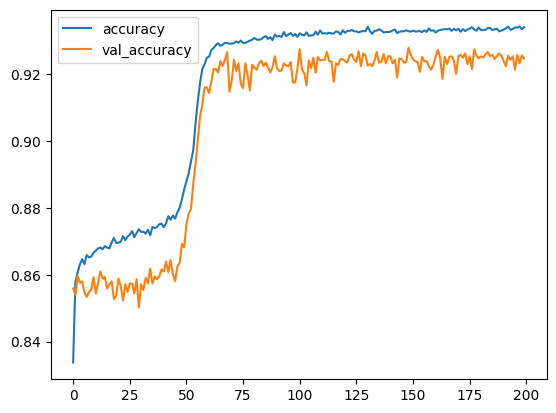

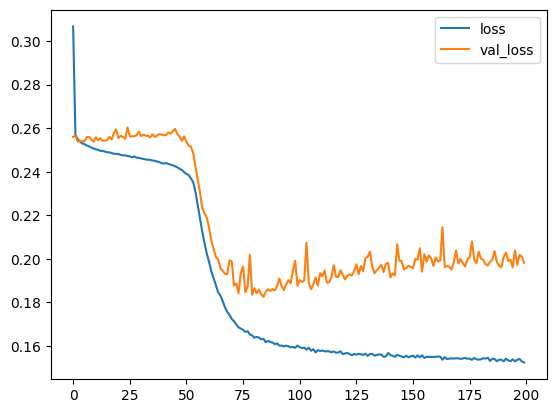

In [125]:
# Plot Training Results

history_seq_df_4[['accuracy', 'val_accuracy']].plot()
history_seq_df_4[['loss', 'val_loss']].plot()

The model overfits but not as much as the second model.

In [126]:
model_functional_4.predict(X_test)

174/174 [==============================] - 1s 2ms/step


array([[2.1353436e-10],
       [9.8334205e-01],
       [9.7461700e-01],
       ...,
       [8.8365304e-01],
       [8.2419646e-01],
       [2.7186907e-08]], dtype=float32)

In [127]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq_4 = model_functional_4.predict(X_test)
y_pred_seq_4 = np.where(y_pred_seq_4 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_4))

 40/174 [=====>........................] - ETA: 0s

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2496
           1       0.91      0.96      0.93      3056

    accuracy                           0.92      5552
   macro avg       0.93      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



The fourth model has made good improvement with most of the evaluation scores are aboove 90%, except the recall score for "0" (88%). User has decided to save the fourth model for model inferencing based on the loss graph and the overall score improvement.

# Model Saving

In [129]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [130]:
# Model Summary

model_functional_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           832         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            68          ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 2)            10          ['dense_1[0][0]']                
                                                                                              

In [131]:
# Freeze Model

model_functional_4.trainable = False
model_functional_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           832         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            68          ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 2)            10          ['dense_1[0][0]']                
                                                                                              

In [132]:
# Save ANN Model

model_functional_4.save('churn_model.h5')

# Model Inference

The result of the model inference is on the notebook file 'ah8dsft_P2M1_Model_inference_abi_sugiri.ipynb'

# Conclusions

- From the EDA of the dataset, we concluded that the website churn rate is very high, over 40%. The average churn rate of a website is around 5-7% yearly and 3% for 1 month. High churn rate can affect directly to the revenue from the customer and other companies that spends their advertisement on the website. The most type of feedback that the website recieved is negative feedback, such as "Too many ads", "Poor Website", "Poor Product Quality", and "Poor Customer Service". These analysis from the feedbacks can help the company to focus on which aspect that are needed improvement. For example, by employing people to focus on improving the website such as UI/UX experts and engineer.

- Along with EDA, predicting churn rate score from can customer by implementing machine learning approach where in this case Artificial Neural Network (ANN) can help the company. The two types of ANN models, Sequential API and Functional API, are utilized as the first attempt of predicting and shown promising results based on the scores from the classification report, such as precission, recall, f1-score and accuracy. The user tried improving the model by trial and error with the objective to increase the classificiation report score and make goodfit models. In the end the fourth model was chosen for model inferencing because the overall scores.